#**Regression vs Classification**
![image](https://www.simplilearn.com/ice9/free_resources_article_thumb/Regression_vs_Classification.jpg)

# **Classification Algorithms**



#Import Libraries

In [26]:
import numpy as np
import pandas as pd

### Graphical representation
import matplotlib.pyplot as plt
import seaborn as sns

### Sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

### Models and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

### Metrices
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, precision_score, classification_report

import warnings
warnings.filterwarnings('ignore')

#Dataset

In [2]:
df  = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Shape of Dataset

In [3]:
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  768
Number of columns:  9


#Information of Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#Checking Null values in Dataset

In [7]:
# Checking null values in any column

df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
# Full rows having all ull values

df.isnull().all(0).sum()

0

In [9]:
# Full columns having all ull values

df.isnull().all(1).sum()

0

#Checking the number of unique values in each column

In [14]:
for i in df.columns:
  print(i, ':', df[i].nunique())

Pregnancies : 17
Glucose : 136
BloodPressure : 47
SkinThickness : 51
Insulin : 186
BMI : 248
DiabetesPedigreeFunction : 517
Age : 52
Outcome : 2


# Value count in Target column

In [21]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [22]:
df['Outcome'].value_counts(normalize = True) * 100

,proportion
Outcome,
0,65.104167
1,34.895833


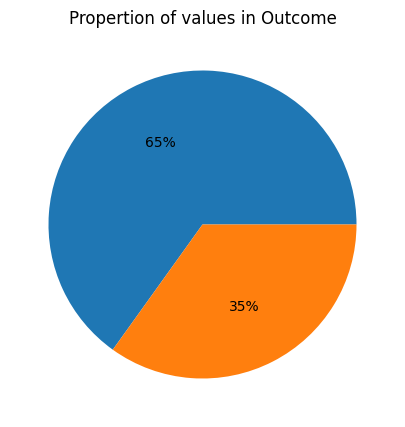

In [43]:
plt.figure(figsize=(10,5))
plt.pie(df['Outcome'].value_counts().values, autopct = '%1.0f%%')
plt.title ('Propertion of values in Outcome')
plt.show()


The propertion of data in target column i.e., 'outcome' is 65% and 35%, so no need of sampling

In [48]:
correlation_matrix = df.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


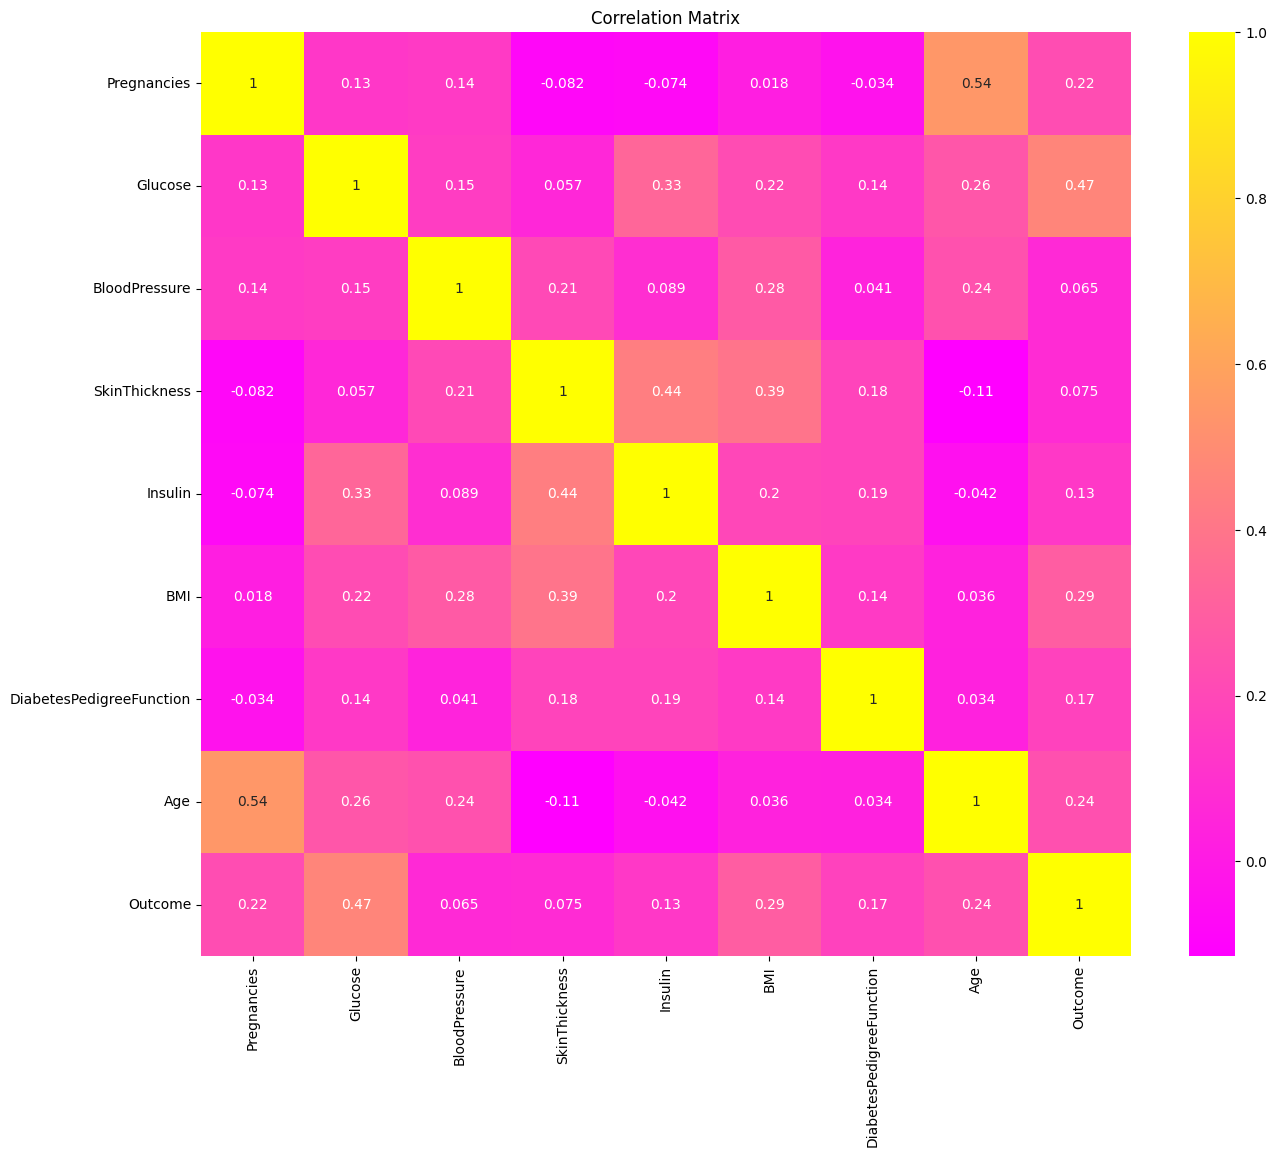

In [53]:
plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix, annot=True, cmap='spring')
plt.title('Correlation Matrix')
plt.show()

# Splitting dataset

In [ ]:
# Split into X and Y
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
# Split into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=100)

In [ ]:
y_train.value_counts(normalize=True) * 100

,proportion
Outcome,
0,65.14658
1,34.85342


In [ ]:
y_test.value_counts(normalize=True) * 100

,proportion
Outcome,
0,64.935065
1,35.064935


#Scaling dataset

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Preparing dictionary of all algorithms

In [ ]:
model_dict = {'Logistic Regression': LogisticRegression(), 'SVC': SVC(), 'KNN': KNeighborsClassifier(), 'Decision Tree': DecisionTreeClassifier(),
              'Random Forest': RandomForestClassifier(), 'AdaBoost': AdaBoostClassifier()}

#Score Check

Accuracy Score

In [ ]:
for key, value in model_dict.items():
    print(f'-------------------Training Started: {key}--------------------------')
    value.fit(x_train, y_train)

    y_pred_train = value.predict(x_train)
    print(f'{key} trained accuracy score: ', accuracy_score(y_train, y_pred_train))

    y_pred_test = value.predict(x_test)
    print(f'{key} tested accuracy score: ', accuracy_score(y_test, y_pred_test))


-------------------Training Started: Logistic Regression--------------------------
Logistic Regression trained accuracy score:  0.7801302931596091
Logistic Regression tested accuracy score:  0.7857142857142857
-------------------Training Started: SVC--------------------------
SVC trained accuracy score:  0.8257328990228013
SVC tested accuracy score:  0.7857142857142857
-------------------Training Started: KNN--------------------------
KNN trained accuracy score:  0.8159609120521173
KNN tested accuracy score:  0.7532467532467533
-------------------Training Started: Decision Tree--------------------------
Decision Tree trained accuracy score:  1.0
Decision Tree tested accuracy score:  0.7207792207792207
-------------------Training Started: Random Forest--------------------------
Random Forest trained accuracy score:  1.0
Random Forest tested accuracy score:  0.7662337662337663
-------------------Training Started: AdaBoost--------------------------
AdaBoost trained accuracy score:  0.8273

In [ ]:
# Accuracy score of Logistic Regression, SVC, KNN & AdaBoost will be considered as the difference between trained and tested score is not more
# Accuracy score of Logistic Regression will be considered as the tested score is more than trained score

Precision Score

In [ ]:
for key, value in model_dict.items():
    print(f'-------------------Training Started: {key}--------------------------')
    value.fit(x_train, y_train)

    y_pred_train = value.predict(x_train)
    print(f'{key} trained precision score: ', precision_score(y_train, y_pred_train))

    y_pred_test = value.predict(x_test)
    print(f'{key} tested precision score: ', precision_score(y_test, y_pred_test))

-------------------Training Started: Logistic Regression--------------------------
Logistic Regression trained precision score:  0.7337278106508875
Logistic Regression tested precision score:  0.7692307692307693
-------------------Training Started: SVC--------------------------
SVC trained precision score:  0.8451612903225807
SVC tested precision score:  0.7837837837837838
-------------------Training Started: KNN--------------------------
KNN trained precision score:  0.7790055248618785
KNN tested precision score:  0.6739130434782609
-------------------Training Started: Decision Tree--------------------------
Decision Tree trained precision score:  1.0
Decision Tree tested precision score:  0.5483870967741935
-------------------Training Started: Random Forest--------------------------
Random Forest trained precision score:  1.0
Random Forest tested precision score:  0.7555555555555555
-------------------Training Started: AdaBoost--------------------------
AdaBoost trained precision sco

In [ ]:
# Precision score of SVC is considerable

Recall Score

In [ ]:
for key, value in model_dict.items():
    print(f'-------------------Training Started: {key}--------------------------')
    value.fit(x_train, y_train)

    y_pred_train = value.predict(x_train)
    print(f'{key} trained recall score: ', recall_score(y_train, y_pred_train))

    y_pred_test = value.predict(x_test)
    print(f'{key} tested recall score: ', recall_score(y_test, y_pred_test))

-------------------Training Started: Logistic Regression--------------------------
Logistic Regression trained recall score:  0.5794392523364486
Logistic Regression tested recall score:  0.5555555555555556
-------------------Training Started: SVC--------------------------
SVC trained recall score:  0.6121495327102804
SVC tested recall score:  0.5370370370370371
-------------------Training Started: KNN--------------------------
KNN trained recall score:  0.6588785046728972
KNN tested recall score:  0.5740740740740741
-------------------Training Started: Decision Tree--------------------------
Decision Tree trained recall score:  1.0
Decision Tree tested recall score:  0.7037037037037037
-------------------Training Started: Random Forest--------------------------
Random Forest trained recall score:  1.0
Random Forest tested recall score:  0.5925925925925926
-------------------Training Started: AdaBoost--------------------------
AdaBoost trained recall score:  0.6915887850467289
AdaBoost 

In [ ]:
# Recall score of any model could not able to perform well

F1 Score

In [ ]:
for key, value in model_dict.items():
    print(f'-------------------Training Started: {key}--------------------------')
    value.fit(x_train, y_train)

    y_pred_train = value.predict(x_train)
    print(f'{key} trained F1 score: ', f1_score(y_train, y_pred_train))

    y_pred_test = value.predict(x_test)
    print(f'{key} tested F1 score: ', f1_score(y_test, y_pred_test))

-------------------Training Started: Logistic Regression--------------------------
Logistic Regression trained F1 score:  0.6475195822454308
Logistic Regression tested F1 score:  0.6451612903225806
-------------------Training Started: SVC--------------------------
SVC trained F1 score:  0.7100271002710027
SVC tested F1 score:  0.6373626373626373
-------------------Training Started: KNN--------------------------
KNN trained F1 score:  0.7139240506329114
KNN tested F1 score:  0.62
-------------------Training Started: Decision Tree--------------------------
Decision Tree trained F1 score:  1.0
Decision Tree tested F1 score:  0.5982905982905983
-------------------Training Started: Random Forest--------------------------
Random Forest trained F1 score:  1.0
Random Forest tested F1 score:  0.6391752577319587
-------------------Training Started: AdaBoost--------------------------
AdaBoost trained F1 score:  0.736318407960199
AdaBoost tested F1 score:  0.6476190476190476


In [ ]:
# F1 score of all the models failed to perform well

Confusion Matrix

In [ ]:
for key, value in model_dict.items():
    print(f'-------------------Training Started: {key}--------------------------')
    value.fit(x_train, y_train)

    y_pred_train = value.predict(x_train)
    print(f'{key} trained confusion matrix: ', confusion_matrix(y_train, y_pred_train))

    y_pred_test = value.predict(x_test)
    print(f'{key} tested confusion matrix: ', confusion_matrix(y_test, y_pred_test))

-------------------Training Started: Logistic Regression--------------------------
Logistic Regression trained confusion matrix:  [[355  45]
 [ 90 124]]
Logistic Regression tested confusion matrix:  [[91  9]
 [24 30]]
-------------------Training Started: SVC--------------------------
SVC trained confusion matrix:  [[376  24]
 [ 83 131]]
SVC tested confusion matrix:  [[92  8]
 [25 29]]
-------------------Training Started: KNN--------------------------
KNN trained confusion matrix:  [[360  40]
 [ 73 141]]
KNN tested confusion matrix:  [[85 15]
 [23 31]]
-------------------Training Started: Decision Tree--------------------------
Decision Tree trained confusion matrix:  [[400   0]
 [  0 214]]
Decision Tree tested confusion matrix:  [[73 27]
 [20 34]]
-------------------Training Started: Random Forest--------------------------
Random Forest trained confusion matrix:  [[400   0]
 [  0 214]]
Random Forest tested confusion matrix:  [[83 17]
 [20 34]]
-------------------Training Started: AdaBo

#Hyperparameter Tuning

Parameters

In [ ]:
param_dict = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1','l2', 'elasticnet'], 'class_weight': ['balanced', None], 'solver':['liblinear', 'lbfgs', 'saga']},
    'SVC': {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto'], 'class_weight': ['balanced', None]},
    'KNN': {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
    'Decision Tree': {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'class_weight': ['balanced', None]},
    'Random Forest': {'n_estimators': [100, 200, 500], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'class_weight': ['balanced', None]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
}

Cross validaion

In [ ]:
cv_strategy = StratifiedKFold (n_splits=5)

Model preparation

In [ ]:
best_model_dict = {}

for key in model_dict:
    print(f'{key} started')
    model = model_dict[key]
    parameter = param_dict[key]

    rd = RandomizedSearchCV(model, parameter, cv=cv_strategy, scoring='accuracy', verbose = 2, n_jobs = -1, n_iter = 5)

    rd.fit(x_train, y_train)

    best_model_dict[key] = rd.best_estimator_

    print(f'{key} is done')

Logistic Regression started
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Logistic Regression is done
SVC started
Fitting 5 folds for each of 5 candidates, totalling 25 fits
SVC is done
KNN started
Fitting 5 folds for each of 5 candidates, totalling 25 fits
KNN is done
Decision Tree started
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Decision Tree is done
Random Forest started
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Random Forest is done
AdaBoost started
Fitting 5 folds for each of 5 candidates, totalling 25 fits
AdaBoost is done


Models with their best parameters

In [ ]:
best_model_dict

{'Logistic Regression': LogisticRegression(C=10, solver='saga'),
 'SVC': SVC(C=100, gamma='auto', kernel='linear'),
 'KNN': KNeighborsClassifier(n_neighbors=9, p=1),
 'Decision Tree': DecisionTreeClassifier(max_depth=30, min_samples_split=10),
 'Random Forest': RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                        n_estimators=500),
 'AdaBoost': AdaBoostClassifier(learning_rate=0.1, n_estimators=200)}

#Preparing the models with their best fitted parameters

In [ ]:
log_reg = LogisticRegression(C=10, solver='saga')
svc =  SVC(C=100, gamma='auto', kernel='linear')
knn = KNeighborsClassifier(n_neighbors=9, p=1)
dt = DecisionTreeClassifier(max_depth=30, min_samples_split=10)
rf = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5, n_estimators=500)
ada =  AdaBoostClassifier(learning_rate=0.1, n_estimators=200)


#Preparing another model dictionary with the respective best fitted parameters

In [ ]:
model_dict_1 = {'LogisticRegression': log_reg, 'SVC': svc, 'KNN': knn, 'DecisionTree': dt, 'RandomForest': rf, 'AdaBoost': ada}

#Score Check

Accuracy Score

In [ ]:
for key_1, value_1 in model_dict_1.items():
    print(f'-------------------Training Started: {key_1}--------------------------')
    value_1.fit(x_train, y_train)

    y_pred_train = value_1.predict(x_train)
    print(f'{key_1} trained accuracy score: ', accuracy_score(y_train, y_pred_train))

    y_pred_test = value_1.predict(x_test)
    print(f'{key_1} tested accuracy score: ', accuracy_score(y_test, y_pred_test))


-------------------Training Started: LogisticRegression--------------------------
LogisticRegression trained accuracy score:  0.7801302931596091
LogisticRegression tested accuracy score:  0.7792207792207793
-------------------Training Started: SVC--------------------------
SVC trained accuracy score:  0.7850162866449512
SVC tested accuracy score:  0.7792207792207793
-------------------Training Started: KNN--------------------------
KNN trained accuracy score:  0.7801302931596091
KNN tested accuracy score:  0.7272727272727273
-------------------Training Started: DecisionTree--------------------------
DecisionTree trained accuracy score:  0.9267100977198697
DecisionTree tested accuracy score:  0.6818181818181818
-------------------Training Started: RandomForest--------------------------
RandomForest trained accuracy score:  0.9739413680781759
RandomForest tested accuracy score:  0.7922077922077922
-------------------Training Started: AdaBoost--------------------------
AdaBoost trained ac

In [ ]:
# With best fitted parameters Accuracy Score of LogisticRegression, SVC, RandomForest & AdaBoost could be considered

Precision Score

In [ ]:
for key_1, value_1 in model_dict_1.items():
    print(f'-------------------Training Started: {key_1}--------------------------')
    value_1.fit(x_train, y_train)

    y_pred_train = value_1.predict(x_train)
    print(f'{key_1} trained precision score: ', precision_score(y_train, y_pred_train))

    y_pred_test = value_1.predict(x_test)
    print(f'{key_1} tested precision score: ', precision_score(y_test, y_pred_test))

-------------------Training Started: LogisticRegression--------------------------
LogisticRegression trained precision score:  0.7337278106508875
LogisticRegression tested precision score:  0.75
-------------------Training Started: SVC--------------------------
SVC trained precision score:  0.75625
SVC tested precision score:  0.75
-------------------Training Started: KNN--------------------------
KNN trained precision score:  0.7423312883435583
KNN tested precision score:  0.6666666666666666
-------------------Training Started: DecisionTree--------------------------
DecisionTree trained precision score:  0.9289340101522843
DecisionTree tested precision score:  0.5454545454545454
-------------------Training Started: RandomForest--------------------------
RandomForest trained precision score:  0.9854368932038835
RandomForest tested precision score:  0.7083333333333334
-------------------Training Started: AdaBoost--------------------------
AdaBoost trained precision score:  0.75280898876

In [ ]:
# Precision score of any model after best fitted parameters could not able to perform well

Recall Score

In [ ]:
for key_1, value_1 in model_dict_1.items():
    print(f'-------------------Training Started: {key_1}--------------------------')
    value_1.fit(x_train, y_train)

    y_pred_train = value_1.predict(x_train)
    print(f'{key_1} trained recall score: ', recall_score(y_train, y_pred_train))

    y_pred_test = value_1.predict(x_test)
    print(f'{key_1} tested recall score: ', recall_score(y_test, y_pred_test))

-------------------Training Started: LogisticRegression--------------------------
LogisticRegression trained recall score:  0.5794392523364486
LogisticRegression tested recall score:  0.5555555555555556
-------------------Training Started: SVC--------------------------
SVC trained recall score:  0.5654205607476636
SVC tested recall score:  0.5555555555555556
-------------------Training Started: KNN--------------------------
KNN trained recall score:  0.5654205607476636
KNN tested recall score:  0.4444444444444444
-------------------Training Started: DecisionTree--------------------------
DecisionTree trained recall score:  0.8551401869158879
DecisionTree tested recall score:  0.5555555555555556
-------------------Training Started: RandomForest--------------------------
RandomForest trained recall score:  0.9439252336448598
RandomForest tested recall score:  0.6111111111111112
-------------------Training Started: AdaBoost--------------------------
AdaBoost trained recall score:  0.62616

In [ ]:
# Recall scores of all models failed to fit well as the difference between trained and tested model is much more

F1 Score

In [ ]:
for key_1, value_1 in model_dict_1.items():
    print(f'-------------------Training Started: {key_1}--------------------------')
    value_1.fit(x_train, y_train)

    y_pred_train = value_1.predict(x_train)
    print(f'{key_1} trained F1 score: ', f1_score(y_train, y_pred_train))

    y_pred_test = value_1.predict(x_test)
    print(f'{key_1} tested F1 score: ', f1_score(y_test, y_pred_test))

-------------------Training Started: LogisticRegression--------------------------
LogisticRegression trained F1 score:  0.6475195822454308
LogisticRegression tested F1 score:  0.6382978723404256
-------------------Training Started: SVC--------------------------
SVC trained F1 score:  0.6470588235294118
SVC tested F1 score:  0.6382978723404256
-------------------Training Started: KNN--------------------------
KNN trained F1 score:  0.6419098143236074
KNN tested F1 score:  0.5333333333333333
-------------------Training Started: DecisionTree--------------------------
DecisionTree trained F1 score:  0.8905109489051095
DecisionTree tested F1 score:  0.5818181818181818
-------------------Training Started: RandomForest--------------------------
RandomForest trained F1 score:  0.9738717339667459
RandomForest tested F1 score:  0.6464646464646465
-------------------Training Started: AdaBoost--------------------------
AdaBoost trained F1 score:  0.6836734693877551
AdaBoost tested F1 score:  0.64


In [ ]:
# F1 scores of all models failed to fit well as the difference between trained and tested model is much more

Confusion Matrix

In [ ]:
for key_1, value_1 in model_dict_1.items():
    print(f'-------------------Training Started: {key_1}--------------------------')
    value_1.fit(x_train, y_train)

    y_pred_train = value_1.predict(x_train)
    print(f'{key_1} trained confusion matrix: ', confusion_matrix(y_train, y_pred_train))

    y_pred_test = value_1.predict(x_test)
    print(f'{key_1} tested confusion matrix: ', confusion_matrix(y_test, y_pred_test))

-------------------Training Started: LogisticRegression--------------------------
LogisticRegression trained confusion matrix:  [[355  45]
 [ 90 124]]
LogisticRegression tested confusion matrix:  [[90 10]
 [24 30]]
-------------------Training Started: SVC--------------------------
SVC trained confusion matrix:  [[361  39]
 [ 93 121]]
SVC tested confusion matrix:  [[90 10]
 [24 30]]
-------------------Training Started: KNN--------------------------
KNN trained confusion matrix:  [[358  42]
 [ 93 121]]
KNN tested confusion matrix:  [[88 12]
 [30 24]]
-------------------Training Started: DecisionTree--------------------------
DecisionTree trained confusion matrix:  [[386  14]
 [ 31 183]]
DecisionTree tested confusion matrix:  [[77 23]
 [22 32]]
-------------------Training Started: RandomForest--------------------------
RandomForest trained confusion matrix:  [[397   3]
 [ 10 204]]
RandomForest tested confusion matrix:  [[87 13]
 [21 33]]
-------------------Training Started: AdaBoost------